In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import plotly.express as px


In [28]:
df = pd.read_csv('Gold Futures Historical Data (1).csv')

In [29]:
df


,Date,Price,Open,High,Low,Vol.,Change %
0,12/29/2023,"2,071.80","2,076.10","2,084.10","2,067.60",105.72K,-0.56%
1,12/28/2023,"2,083.50","2,089.50","2,098.20","2,074.60",129.54K,0.00%
2,12/27/2023,"2,083.40","2,068.00","2,085.30","2,063.30",0.59K,1.12%
3,12/26/2023,"2,060.40","2,056.30","2,069.60","2,056.30",0.29K,-0.30%
4,12/25/2023,"2,066.65","2,065.30","2,067.60","2,065.30",NaN,0.34%
...,...,...,...,...,...,...,...
2842,01/08/2013,"1,662.20","1,647.60","1,662.70","1,646.80",146.84K,0.97%
2843,01/07/2013,"1,646.30","1,656.30","1,663.00","1,642.60",140.82K,-0.16%
2844,01/04/2013,"1,648.90","1,663.80","1,664.50","1,626.00",252.73K,-1.53%
2845,01/03/2013,"1,674.60","1,686.20","1,690.50","1,661.20",143.79K,-0.84%


In [30]:
df.isnull().sum()

Date         0
Price        0
Open         0
High         0
Low          0
Vol.        17
Change %     0
dtype: int64

In [31]:
df.shape

(2847, 7)

In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2847 entries, 0 to 2846
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2847 non-null   object
 1   Price     2847 non-null   object
 2   Open      2847 non-null   object
 3   High      2847 non-null   object
 4   Low       2847 non-null   object
 5   Vol.      2830 non-null   object
 6   Change %  2847 non-null   object
dtypes: object(7)
memory usage: 155.8+ KB


In [33]:
import warnings
warnings.filterwarnings("ignore")


In [34]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,2847,2847,2847,2847,2847,2830,2847
unique,2847,2284,2252,2308,2299,2642,472
top,12/29/2023,"1,294.80","1,223.00","1,299.00","1,272.00",0.02K,0.00%
freq,1,5,5,5,5,6,33


In [35]:
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)


In [36]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [37]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [38]:
df.head()


,Date,Price,Open,High,Low,year,month,day
0,2013-01-02,"1,688.80","1,676.40","1,695.40","1,670.90",2013,1,2
1,2013-01-03,"1,674.60","1,686.20","1,690.50","1,661.20",2013,1,3
2,2013-01-04,"1,648.90","1,663.80","1,664.50","1,626.00",2013,1,4
3,2013-01-07,"1,646.30","1,656.30","1,663.00","1,642.60",2013,1,7
4,2013-01-08,"1,662.20","1,647.60","1,662.70","1,646.80",2013,1,8


In [39]:
df.duplicated().sum()


0

In [40]:
# Remove commas from numerical columns
numeric_columns = ['Price', 'Open', 'High', 'Low']
for col in numeric_columns:
    df[col] = df[col].str.replace(',', '').astype(float)



In [41]:
X = df[['Open', 'High', 'Low', 'year', 'month', 'day']]  # Features
y = df['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

# Calculate Test Loss
test_loss = rf_model.score(X_test, y_test)
print("Test Loss:", test_loss)

# Calculate Test MAPE (Mean Absolute Percentage Error)
MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Test MAPE:", MAPE)

# Calculate Test Accuracy
Accuracy = 100 - MAPE
print("Test Accuracy:", Accuracy)


Mean Absolute Error: 6.679771751853279
Mean Squared Error: 90.85392333612967
R-squared: 0.998894355193606
Test Loss: 0.998894355193606
Test MAPE: 0.4438159111691815
Test Accuracy: 99.55618408883082


Date: 2024-01-01, Predicted Price: 1485.281
Date: 2024-01-02, Predicted Price: 1485.281
Date: 2024-01-03, Predicted Price: 1485.281
Date: 2024-01-04, Predicted Price: 1485.281
Date: 2024-01-05, Predicted Price: 1485.281
Date: 2024-01-06, Predicted Price: 1485.281
Date: 2024-01-07, Predicted Price: 1485.281
Date: 2024-01-08, Predicted Price: 1485.281
Date: 2024-01-09, Predicted Price: 1485.3110000000001
Date: 2024-01-10, Predicted Price: 1485.3110000000001
Date: 2024-01-11, Predicted Price: 1485.958
Date: 2024-01-12, Predicted Price: 1485.958
Date: 2024-01-13, Predicted Price: 1485.958
Date: 2024-01-14, Predicted Price: 1485.958
Date: 2024-01-15, Predicted Price: 1486.001
Date: 2024-01-16, Predicted Price: 1486.001
Date: 2024-01-17, Predicted Price: 1485.5400000000002
Date: 2024-01-18, Predicted Price: 1485.5400000000002
Date: 2024-01-19, Predicted Price: 1485.767
Date: 2024-01-20, Predicted Price: 1486.865
Date: 2024-01-21, Predicted Price: 1487.626
Date: 2024-01-22, Predicted Price: 1

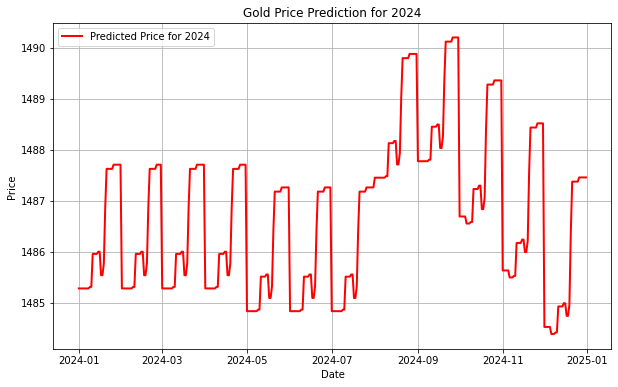

In [44]:

# توليد التواريخ لعام 2024
date_range_2024 = pd.date_range(start='2024-01-01', end='2024-12-31')

# إنشاء DataFrame بالتواريخ
df_2024 = pd.DataFrame(date_range_2024, columns=['Date'])

# استخراج السنة والشهر واليوم من التواريخ
df_2024['year'] = df_2024['Date'].dt.year
df_2024['month'] = df_2024['Date'].dt.month
df_2024['day'] = df_2024['Date'].dt.day

# افتراض متوسط القيم من بيانات التدريب لمتغيرات 'Open', 'High', 'Low' لعام 2024
average_open = X_train['Open'].mean()
average_high = X_train['High'].mean()
average_low = X_train['Low'].mean()

df_2024['Open'] = average_open
df_2024['High'] = average_high
df_2024['Low'] = average_low

# تحديد الميزات للتنبؤ
X_2024 = df_2024[['Open', 'High', 'Low', 'year', 'month', 'day']]

# التنبؤ بأسعار الذهب لعام 2024
y_pred_2024 = rf_model.predict(X_2024)

# إضافة التوقعات إلى DataFrame
df_2024['Predicted_Price'] = y_pred_2024

# طباعة التواريخ مع الأسعار المتوقعة لعام 2024
for date, predicted_price in zip(df_2024['Date'], df_2024['Predicted_Price']):
    print(f"Date: {date.date()}, Predicted Price: {predicted_price}")

# رسم البيانات المتنبأ بها لعام 2024 باستخدام Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Date'], df_2024['Predicted_Price'], color='red', lw=2, label='Predicted Price for 2024')
plt.title('Gold Price Prediction for 2024')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# إنشاء DataFrame للبيانات المتوقعة لعام 2024
predicted_data_2024 = pd.DataFrame({'Date': df_2024['Date'], 'Predicted Price': df_2024['Predicted_Price']})

# رسم البيانات المتوقعة لعام 2024 باستخدام Plotly
fig = px.line(predicted_data_2024, x='Date', y='Predicted Price', title='Predicted Gold Price for 2024')
fig.show()


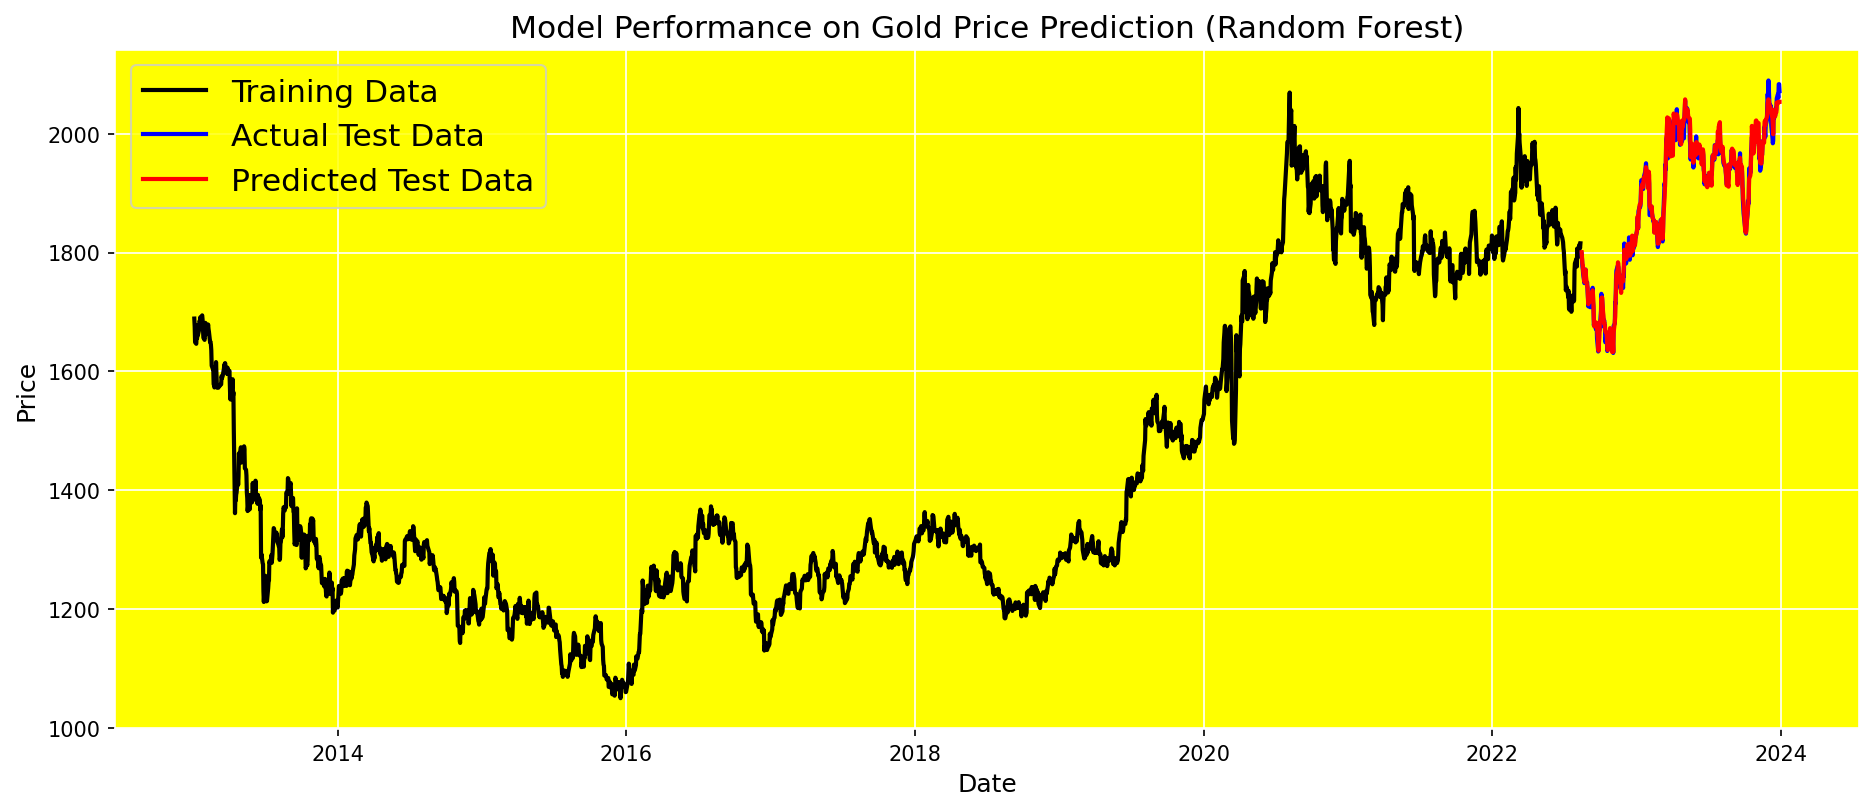

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Gold Futures Historical Data (1).csv')

# Data preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)

# Remove commas from numerical columns
numeric_columns = ['Price', 'Open', 'High', 'Low']
for col in numeric_columns:
    df[col] = df[col].str.replace(',', '').astype(float)

# Feature engineering
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# Define features and target variable
X = df[['Open', 'High', 'Low', 'year', 'month', 'day']]  # Features
y = df['Price']  # Target variable

# Scale the target variable
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Split the data into training and testing sets
test_size = 365  # Number of days for testing
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y_scaled[:-test_size], y_scaled[-test_size:]

# Train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train.ravel())

# Predict the test set
y_pred = rf_model.predict(X_test)

# Inverse transform the scaled values to get actual prices
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes', edgecolor='white')

# Inverse transform the training data for plotting
train_data = scaler.inverse_transform(y_scaled[:-test_size])

plt.plot(df['Date'].iloc[:-test_size], train_data, color='black', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Model Performance on Gold Price Prediction (Random Forest)', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()


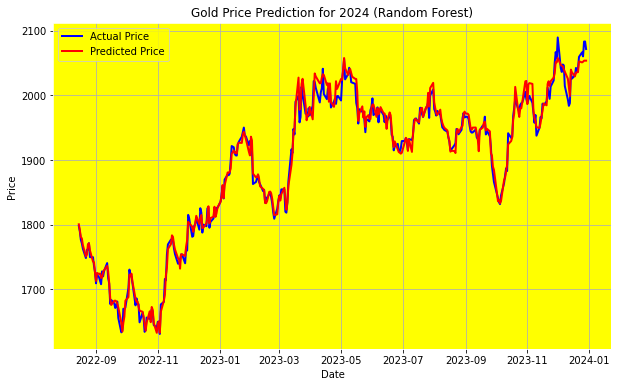

In [50]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

y_test_true = np.array(y_test_true).reshape(-1, 1)
y_test_pred = np.array(y_test_pred).reshape(-1, 1)

plt.figure(figsize=(10, 6))
plt.plot(df['Date'].iloc[-test_size:], y_test_true, color='blue', lw=2, label='Actual Price')
plt.plot(df['Date'].iloc[-test_size:], y_test_pred, color='red', lw=2, label='Predicted Price')
plt.title('Gold Price Prediction for 2024 (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

predicted_data_2024 = pd.DataFrame({'Date': df['Date'].iloc[-test_size:], 'Predicted Price': y_test_pred.flatten()})

fig = px.line(predicted_data_2024, x='Date', y='Predicted Price', title='Predicted Gold Price for 2024 (Random Forest)')
fig.show()
